# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
#acrescentando o parâmetro "decimal" para reconhecer virgula como ponto decimal.
countries = pd.read_csv("countries.csv", decimal= ',')

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [5]:
countries.shape

(227, 20)

In [6]:
#verificando o tipo das colunas e as entradas
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_density         227 non-null float64
Coastline_ratio     227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GDP                 226 non-null float64
Literacy            209 non-null float64
Phones_per_1000     223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [7]:
#removendo os vazios das colunas Country e Region
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()
countries.head()

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [8]:
countries.isna().sum()

Country              0
Region               0
Population           0
Area                 0
Pop_density          0
Coastline_ratio      0
Net_migration        3
Infant_mortality     3
GDP                  1
Literacy            18
Phones_per_1000      4
Arable               2
Crops                2
Other                2
Climate             22
Birthrate            3
Deathrate            4
Agriculture         15
Industry            16
Service             15
dtype: int64

In [9]:
countries['Country'].nunique()

227

In [10]:
countries[np.isnan(countries.Climate)]

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670,3.3,2.02,5.96,4.75,29800.0,97.0,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542,79.5,10.32,1.58,6.84,10600.0,98.5,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
101,Italy,WESTERN EUROPE,58133509,301230,193.0,2.52,2.07,5.94,26700.0,98.6,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200,55.0,0.14,-0.71,6.89,11400.0,99.6,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.00,8.97,4.81,55100.0,100.0,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860


In [11]:
countries['Climate'].unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [12]:
def q1():
    return countries['Region'].sort_values().unique().tolist()

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [13]:
def q2():
    discretizer = KBinsDiscretizer(n_bins = 10, encode = 'ordinal', strategy = 'quantile')
    discretizer_pop_density = discretizer.fit_transform(countries[['Pop_density']])
    return len(discretizer_pop_density[discretizer_pop_density >= 9])

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [14]:
def q3():
    one_hot_encoder = OneHotEncoder(sparse = False, dtype = np.int)
    one_hot_encoder_countries = one_hot_encoder.fit_transform(countries[['Region', 'Climate']].fillna(0))
    return one_hot_encoder_countries.shape[1]

Nota:
* Neste dataset temos 227 países que é também o total de linhas. Portanto, realizar o dropna não seria indicado pois perderíamos os dados de 22 linhas (22 países).

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [15]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [16]:
test_country_new = pd.DataFrame([test_country], columns = new_column_names)
test_country_new

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Test Country,NEAR EAST,-0.190325,-0.323264,-0.044217,-0.275281,0.132559,-0.805485,1.011978,0.618918,1.007486,0.202399,-0.043679,-0.139297,1.31636,-0.369964,-0.61493,-0.85437,0.263445,0.571242


In [37]:
def q4():
    #selecionando somente as features numéricas
    numeric_features = countries.select_dtypes('number')
    
    #construindo o pipeline
    num_pipeline = Pipeline(steps=[('median_imputer', SimpleImputer(strategy = 'median')),
                                   ('standard', StandardScaler())])
    
    #aplicando (fit) o pipeline no dataset somente com features numéricas
    num_pipeline.fit(countries.select_dtypes('number'))
    
    #aplicando e transformando o novo dataset
    test_country_pipeline = num_pipeline.transform(test_country_new.select_dtypes('number'))
    
    test = pd.DataFrame(test_country_pipeline, columns = numeric_features.columns)
    return round(float(test['Arable']),3)

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

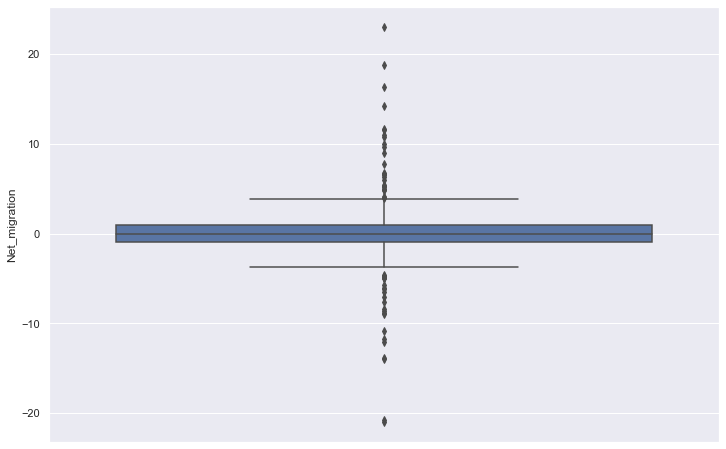

In [18]:
sns.boxplot(countries['Net_migration'].dropna(), orient = 'vertical')

In [19]:
def q5():
    net_migration = countries['Net_migration'].dropna()
    
    q1, q3 = np.quantile (net_migration, [0.25, 0.75])
    iqr = q3 - q1
    
    outliers_abaixo, outliers_acima = sum(net_migration < (q1 - 1.5*iqr)), sum(net_migration > (q3 + 1.5*iqr))
    # em relação à variável net_migration existem muitos "outliers", ou seja, os dados estão muito esparsos. 
    # No entanto não faz sentido remover as observações fora do primeiro e terceiro quartil pois estes significam países diferentes.
    return (outliers_abaixo, outliers_acima, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [20]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [21]:
def q6():
    count_vect = CountVectorizer(vocabulary = ['phone'])
    count_vect_fit = count_vect.fit_transform(newsgroup.data)
    return int(count_vect_fit.sum())

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [41]:
def q7():
    tf_idf_vect = TfidfVectorizer()
    
    tf_idf_vect_fit = tf_idf_vect.fit_transform(newsgroup.data)
    
    #montando um dataframe
    names = tf_idf_vect.get_feature_names()
    data = tf_idf_vect_fit.toarray()
    
    dataframe = pd.DataFrame(data, columns = names)
    return float(round(dataframe['phone'].sum(),3))

In [23]:
# #ainda tentando entender pq não funciona assim

# tf_idf_vect = TfidfVectorizer(vocabulary = ['phone'])
# tf_idf_vect_fit = tf_idf_vect.fit_transform(newsgroup.data)
# names = tf_idf_vect.get_feature_names()
# data = tf_idf_vect_fit.toarray()

# teste = pd.DataFrame(data, columns = names)

# teste['phone'].sum()
# tf_idf_vect_fit.sum()